In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving german.csv to german.csv


In [1]:
file_path = '/content/german.csv'
df = pd.read_csv(file_path)

NameError: ignored

In [ ]:
df.head()

,Unnamed: 0,Status.of.existing.checking.account,Duration.in.month,Credit.history,Purpose,Credit.amount,Savings account/bonds,Present.employment.since,Installment.rate.in.percentage.of.disposable.income,Personal.status.and.sex,...,Property,Age.in.years,Other.installment.plans,Housing,Number.of.existing.credits.at.this.bank,Job,Number.of.people.being.liable.to.provide.maintenance.for,Telephone,foreign.worker,Good.Loan
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,GoodLoan
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,BadLoan
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,GoodLoan
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,GoodLoan
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,BadLoan


In [ ]:
X = df.drop('Good.Loan', axis = 1).fillna(df.mean())
y = df['Good.Loan']

<ipython-input-32-204b9890c62c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = df.drop('Good.Loan', axis = 1).fillna(df.mean())


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6233524549875827, 0.9705882352941176, 'x[11] <= 0.5\ngini = 0.421\nsamples = 800\nvalue = [241, 559]'), Text(0.4147512675910596, 0.9117647058823529, 'x[1] <= 22.5\ngini = 0.486\nsamples = 477\nvalue = [198, 279]'), Text(0.28128233650662254, 0.8529411764705882, 'x[13] <= 0.5\ngini = 0.438\nsamples = 268\nvalue = [87, 181]'), Text(0.24520126241721854, 0.7941176470588235, 'x[12] <= 0.5\ngini = 0.422\nsamples = 254\nvalue = [77, 177]'), Text(0.21277421357615894, 0.7352941176470589, 'x[2] <= 7491.5\ngini = 0.405\nsamples = 241\nvalue = [68, 173]'), Text(0.1677876655629139, 0.6764705882352942, 'x[2] <= 1285.0\ngini = 0.392\nsamples = 235\nvalue = [63, 172]'), Text(0.09768211920529801, 0.6176470588235294, 'x[2] <= 1207.5\ngini = 0.479\nsamples = 83\nvalue = [33, 50]'), Text(0.0695364238410596, 0.5588235294117647, 'x[21] <= 0.5\ngini = 0.423\nsamples = 69\nvalue = [21, 48]'), Text(0.046357615894039736, 0.5, 'x[5] <= 36.0\ngini = 0.491\nsamples = 46\nvalue = [20, 26]'), Text(0.033112582

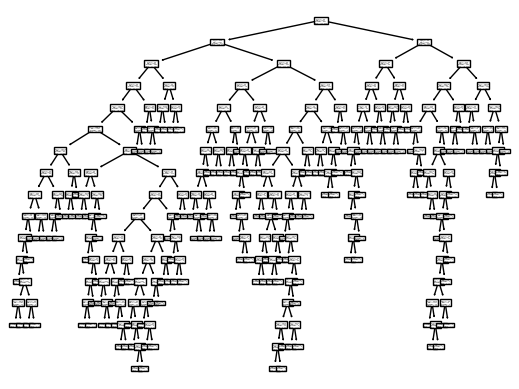

In [ ]:
print(tree.plot_tree(clf))

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: \n", accuracy_score(y_test, y_pred))
print("Confusion Matrics: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy: 
 0.67
Confusion Matrics: 
 [[ 26  33]
 [ 33 108]]
Classification Report: 
               precision    recall  f1-score   support

     BadLoan       0.44      0.44      0.44        59
    GoodLoan       0.77      0.77      0.77       141

    accuracy                           0.67       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.67      0.67      0.67       200

